# Predicción de enfermedad cardíaca utilizando Redes Neuronales Artificiales

Este cuaderno explora el uso de varias bibliotecas de aprendizaje profundo y ciencia de datos en Python en un intento de construir un modelo de aprendizaje profundo capaz de predecir si alguien tiene o no enfermedad cardíaca basándose en sus atributos médicos.

Vamos a seguir el siguiente enfoque:
1. Definición del problema
2. Datos
3. Evaluación
4. Características
5. Modelado
6. Experimentación

## 1. Definición del problema

Dados parámetros clínicos sobre el paciente, ¿podemos predecir si tienen o no enfermedad cardíaca?

## 2. Datos

Los datos originales provienen del conjunto de datos de Cleveland de UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

También hay una versión disponible en Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluación

Si podemos alcanzar una buena precisión en la predicción de si un paciente tiene o no enfermedad cardíaca durante la prueba de concepto, continuaremos con el proyecto. La evaluación se realiza en base a una matriz de confusión.

## 4. Características

Aquí obtendremos información sobre cada una de las características en sus datos.

**Crear un diccionario de datos:**

* Edad
* Sexo
* Tipo de dolor en el pecho (4 valores)
* Presión arterial en reposo
* Colesterol sérico en mg/dl
* Nivel de azúcar en sangre en ayunas (mayor a 120 mg/dl)
* Resultados electrocardiográficos en reposo (valores 0, 1, 2)
* Ritmo cardíaco máximo alcanzado
* Angina inducida por ejercicio
* ST depresión inducida por el ejercicio en relación al reposo (oldpeak)
* Pendiente del segmento ST del ejercicio máximo
* Número de vasos principales (0-3) coloreados por fluoroscopía
* Thal: 3 = normal, 6 = defecto fijo, 7 = defecto reversible

##Preparando las herramientas
Importando todas las herramientas necesarias

In [1]:

# Herramientas de Análisis Exploratorio de Datos (EDA) y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Queremos que nuestras gráficas aparezcan dentro del notebook
%matplotlib inline



In [2]:
#En estas líneas de código, se lee el archivo CSV llamado "Heart.csv" y se almacena en el dataframe df. Luego, 
#se utiliza la función shape para obtener la forma del dataframe, 
#que devuelve una tupla con el número de filas y columnas en el dataframe.
df = pd.read_csv("Heart.csv")
df.shape  

(303, 14)

## Exploración de datos 

El objetivo aquí es conocer más sobre los datos y convertirse en un experto en el tema de los datos con los que estamos trabajando.

1. ¿Qué pregunta(s) estamos tratando de resolver?
2. ¿Qué tipo de datos tenemos y cómo tratamos los diferentes tipos?
3. ¿Qué falta en los datos y cómo se maneja eso?
4. ¿Dónde están los valores atípicos y por qué debemos preocuparnos por ellos?
5. ¿Cómo puedes agregar, cambiar o eliminar características para obtener más información de tus datos?

In [3]:
#Esta línea de código muestra las primeras 10 filas del dataframe df. 
#Proporciona una vista previa de los datos y te permite observar las primeras fila,
#para tener una idea de cómo están estructurados y qué tipo de información contienen.
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#Esta línea de código muestra el dataframe completo df. Al imprimir df, 
#se mostrará todo el contenido del dataframe, lo que te permitirá ver todas las filas y columnas de datos en su totalidad.
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
#Esta línea de código muestra las últimas filas del dataframe df. Al usar df.tail(), se mostrarán las últimas filas del dataframe, 
#lo que te permitirá tener una vista previa de las últimas observaciones de los datos.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Esta línea de código muestra el recuento de valores únicos en la columna "target" del dataframe df. 
#Proporciona información sobre cuántas instancias hay para cada valor único en la columna "target". 
#Esto puede ser útil para comprender la distribución de los valores de destino 
#y tener una idea de la proporción de diferentes clases en el conjunto de datos.
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

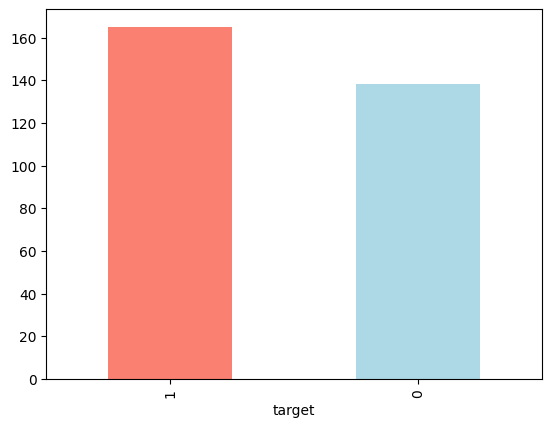

In [6]:
# Esta línea de código genera un gráfico de barras para visualizar la variable objetivo 
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [15]:
#Esta línea de código muestra información sobre el dataframe df. 
#Proporciona un resumen conciso de la estructura del dataframe, 
#incluyendo el número de filas y columnas, el nombre de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
#Esta línea de código muestra la cantidad de valores nulos en cada columna del dataframe 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#calcula varias estadísticas descriptivas, como el recuento de valores, la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50% y 75%).
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frecuencia de cardiopatías según sexo

In [18]:
#Esta línea de código cuenta la cantidad de registros en el dataframe df para cada valor en la columna 'sex' (sexo). 
#Indica el recuento de registros para hombres (1) y mujeres (0) en el conjunto de datos.
df.sex.value_counts() # 1=male, 0=female

1    207
0     96
Name: sex, dtype: int64

In [19]:
# Comparar la columna de destino con la columna de sexo

In [20]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


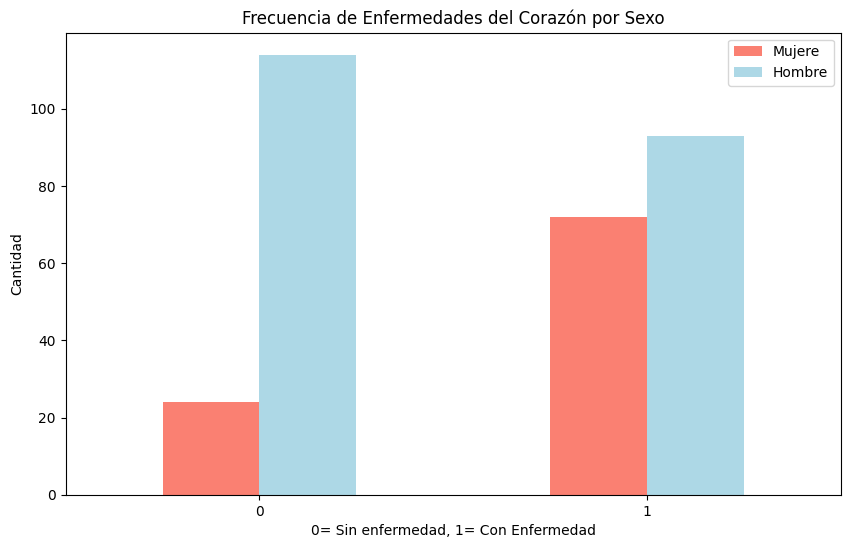

In [30]:
# Este código crea un gráfico de barras utilizando la tabla de cruce (crosstab) entre la columna 'target' y la columna 'sex'. 
#El gráfico muestra la frecuencia de enfermedades del corazón según el sexo. 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Frecuencia de Enfermedades del Corazón por Sexo")
plt.xlabel("0= Sin enfermedad, 1= Con Enfermedad")
plt.ylabel("Cantidad")
plt.legend(["Mujere", "Hombre"])

plt.xticks(rotation=0);

In [22]:
# Edad vs frecuencia cardíaca máxima 
df.thalach.value_counts() # thalach= ritmo cardíaco máximo alcanzado

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

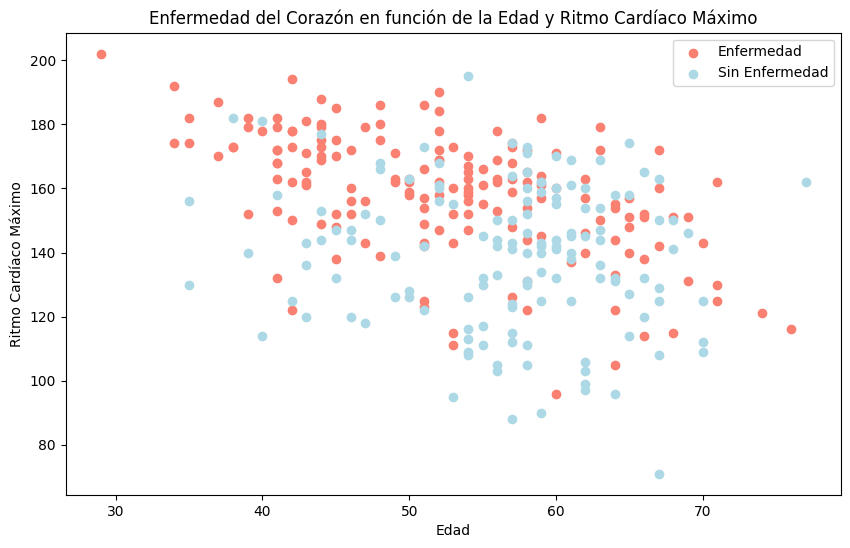

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos en el DataFrame df
df = pd.read_csv("Heart.csv")

plt.figure(figsize=(10, 6))

# Dispersión con ejemplos positivos
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Dispersión con ejemplos negativos
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Agrega información útil
plt.title("Enfermedad del Corazón en función de la Edad y Ritmo Cardíaco Máximo")
plt.xlabel("Edad")
plt.ylabel("Ritmo Cardíaco Máximo")
plt.legend(["Enfermedad", "Sin Enfermedad"])




<Axes: ylabel='Frequency'>

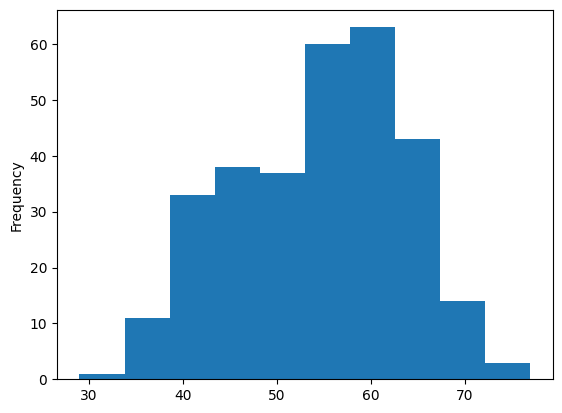

In [6]:
# Comprobando la distribución por edades
df.age.plot.hist()
# Realiza sobre el histograma de valores atípicos es una de las mejores formas
# A partir del siguiente gráfico, no hay consideraciones de edad para la edad con 5,10,20
# A partir del siguiente gráfico, no hay consideraciones de edad para la edad con 90,100,150




## Heart Diease Frequency per chest pain Type



In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

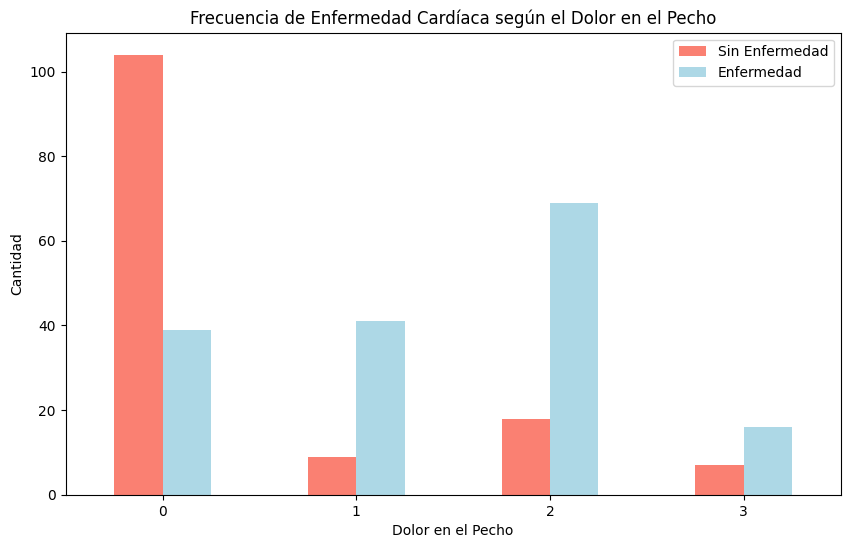

In [8]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

plt.title("Frecuencia de Enfermedad Cardíaca según el Dolor en el Pecho")
plt.xlabel("Dolor en el Pecho")
plt.ylabel("Cantidad")
plt.legend(["Sin Enfermedad", "Con Enfermedad"])
plt.xticks(rotation=0)


In [27]:
# Haga una matriz de correlación (cómo las columnas independientes interactúan entre sí)
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


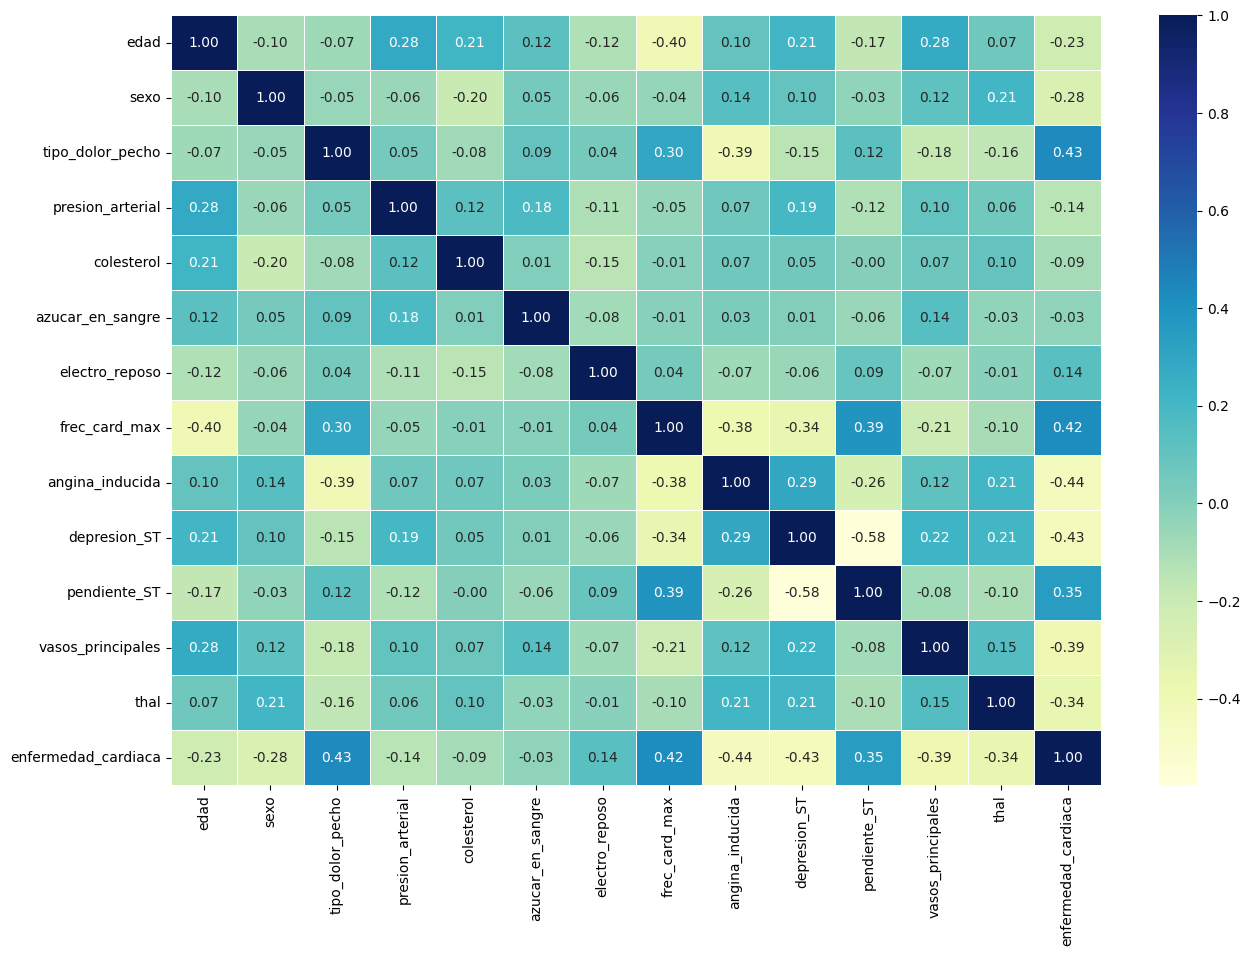

In [14]:
import seaborn as sns
# matriz de correlación
corr_matrix = df.corr()
df = df.rename(columns={'age': 'edad',
                        'sex': 'sexo',
                        'cp': 'tipo_dolor_pecho',
                        'trestbps': 'presion_arterial',
                        'chol': 'colesterol',
                        'fbs': 'azucar_en_sangre',
                        'restecg': 'electro_reposo',
                        'thalach': 'frec_card_max',
                        'exang': 'angina_inducida',
                        'oldpeak': 'depresion_ST',
                        'slope': 'pendiente_ST',
                        'ca': 'vasos_principales',
                        'thal': 'thal',
                        'target': 'enfermedad_cardiaca'})

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f", 
                cmap="YlGnBu")


## 5. Modelado

El código anterior realiza las siguientes tareas:

Crea la variable X que contiene todas las características del DataFrame df excepto la columna "target".
Crea la variable y que contiene la columna "target" del DataFrame df.
Divide los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de sklearn.model_selection. Los datos de entrenamiento se asignan a X_train y y_train, mientras que los datos de prueba se asignan a X_test y y_test. El parámetro test_size=0.2 indica que el 20% de los datos se utilizarán como datos de prueba.
Ten en cuenta que se estableció una semilla aleatoria (np.random.seed(42)) para garantizar la reproducibilidad de la división de los datos.

In [19]:
# Crear las variables X & y
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Ahora que hemos dividido nuestros datos en conjuntos de entrenamiento y prueba, es hora de construir el modelo ML

Lo entrenaremos (encontraremos los patrones) en los datos de entrenamiento

Y lo probaremos (usaremos los patrones) en el conjunto de prueba

Vamos a implementar el modelo en pycharm



  

In [26]:
from tensorflow.keras.models import load_model



El código from tensorflow.keras.models import load_model importa la función load_model del módulo models de la biblioteca tensorflow.keras. Esta función se utiliza para cargar modelos previamente guardados en formato HDF5 (por ejemplo, modelos guardados con model.save()).

In [22]:
model=load_model("heart.h5")

In [29]:
from sklearn.model_selection import train_test_split